![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

In [3]:
# Establecer semillas aleatorias
import random
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [4]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


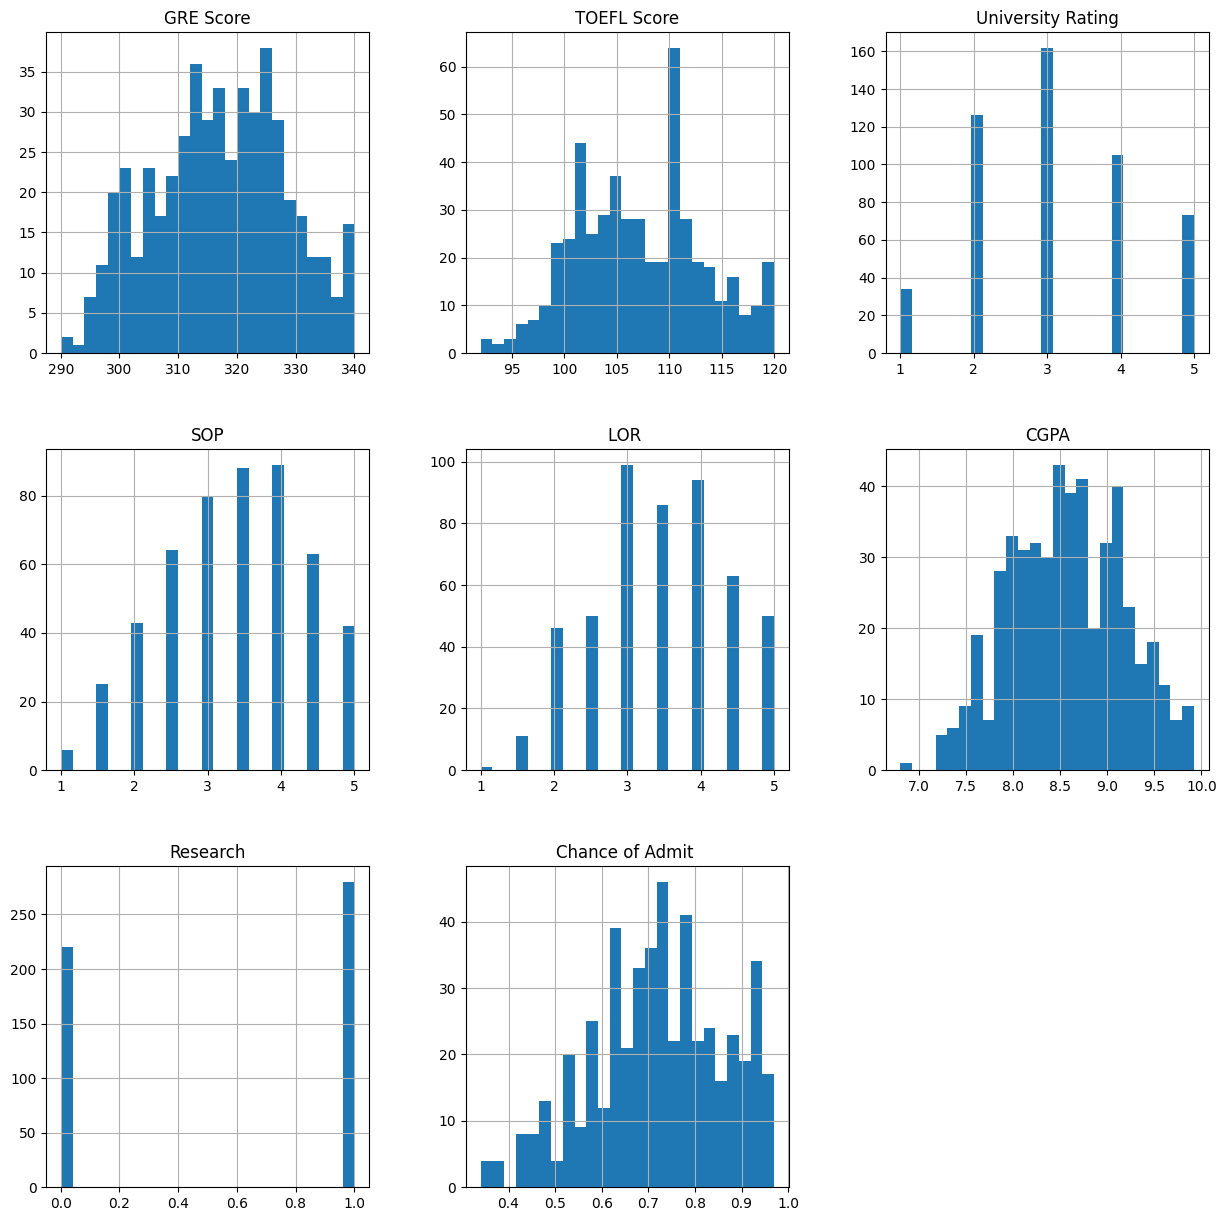

In [5]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [6]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [7]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

In [8]:
# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Transformación de los set de entrenamiento y test
xTrain = pd.DataFrame(data=scaler.transform(xTrain), columns=xTrain.columns, index=xTrain.index)
xTest = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

xTrain = np.array(xTrain)
yTrain = np.array(yTrain)

xTest = np.array(xTest)
yTest = np.array(yTest)

In [9]:
# Definición de dimensiones de salida, varaibles de interés
yTrain = pd.DataFrame(yTrain)
output_var = yTrain.shape[1]
print(output_var, ' output variables')

1  output variables


In [10]:
# Definición de dimensiones de entrada, varaibles predictoras
dims = xTrain.shape[1]
print(dims, 'input variables')

7 input variables


## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [11]:
!pip install livelossplot

In [12]:
# Importación librerías
from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts

In [13]:
# Celda 1
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8 (32.00 Byte)
Trainable params: 8 (32.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


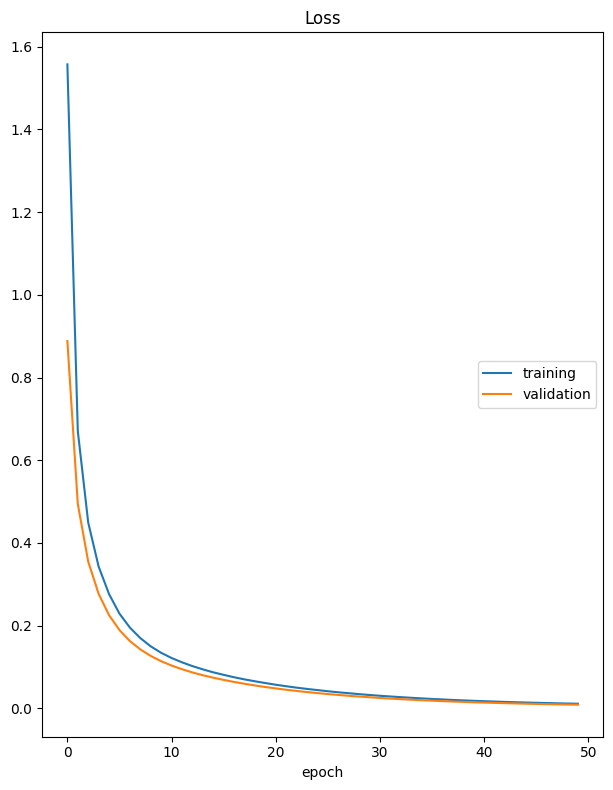

Loss
	training         	 (min:    0.011, max:    1.557, cur:    0.011)
	validation       	 (min:    0.009, max:    0.888, cur:    0.009)
5/5 [==============================] - 0s 6ms/step
Mean Absolute Error (MAE): 0.07291842120488484
Mean Squared Error (MSE): 0.008723287783614234


In [14]:
# Prueba con 50 epocas
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

model.compile(optimizer='sgd', loss='mean_squared_error')

# Entrenamiento de la red neuronal con 50 épocas
model.fit(xTrain, yTrain,
          verbose=1,
          epochs=50,
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])
# Evaluación del modelo
y_pred = model.predict(xTest)
mae = mean_absolute_error(yTest, y_pred)
mse = mean_squared_error(yTest, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')

## Justificación de la selección

### Función de Pérdida: Mean Squared Error (MSE)

Esta función de pérdida es particularmente útil porque penaliza errores grandes más severamente que errores pequeños, lo que ayuda a mejorar la precisión del modelo en casos con variaciones significativas entre las predicciones y los valores reales.

**Ventajas**: Fácil de interpretar y computar, y su derivada es fácil de calcular, lo que facilita el proceso de optimización durante el entrenamiento.

### Número de Épocas: 50

El número de épocas en el entrenamiento de una red neuronal debe ser suficiente para permitir que el modelo aprenda patrones efectivos a partir de los datos sin sobreajustarse. Un número de épocas de 50 es un punto de partida razonable para observar la evolución de la pérdida y hacer ajustes si es necesario. Este número proporciona un equilibrio entre suficiente tiempo de entrenamiento para que el optimizador refine los pesos y evitar el sobreentrenamiento, donde el modelo se ajusta demasiado a los datos de entrenamiento y pierde generalización.

**Ventajas**: Permite suficiente iteración sobre el conjunto de datos completo para que el modelo se ajuste adecuadamente.

### Optimizador: Stochastic Gradient Descent (SGD)

**Justificación**: SGD es un optimizador clásico y ampliamente usado en entrenamientos de redes neuronales debido a su simplicidad y eficacia. Funciona actualizando los parámetros del modelo en pequeños pasos, basados en el gradiente de la función de pérdida con respecto a cada parámetro. SGD puede manejar grandes volúmenes de datos y converger rápidamente para problemas de gran escala debido a que actualiza los pesos incrementales después de ver cada muestra de entrenamiento.

**Ventajas**: Bajo coste computacional por iteración y fácil implementación. Puede escapar de mínimos locales en funciones de pérdida no convexas gracias a su inherente ruido en la actualización de los parámetros.

**Mejoras**: A veces se combina con técnicas como el momentum o se modifica a variantes como Adam para acelerar la convergencia y mejorar la estabilidad del entrenamiento.

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [15]:
K.clear_session() #reiniciar la sesión

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de las capas ocultas y de salida
model.add(Dense(256, input_shape=(dims,),activation='relu')) #capa oculta 1
model.add(Dense(256,activation='relu')) #capa oculta 2
model.add(Dense(output_var))# capa de salida
model.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 68097 (266.00 KB)
Trainable params: 68097 (266.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


En la celda anterior, se definió la arquitectura del modelo, empleando dos capas ocultas de 256 neuronas cada una. Se eligió este valor, para permitirle al modelo la capacidad de adaptarse a datos potencialmente complejos de forma más rápida, en especial considerando que se emplean sólamente dos capas ocultas.
Para la primera capa, las variables de entrada son las X, y para la segunda son las salidas de la capa anterior. La función de activación es "relu", o Rectified Lineal Unit.

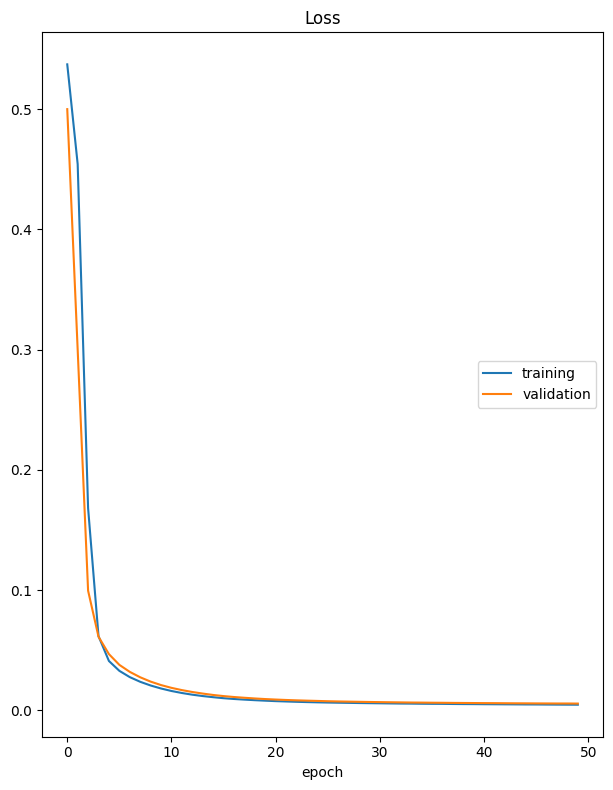

Loss
	training         	 (min:    0.005, max:    0.537, cur:    0.005)
	validation       	 (min:    0.006, max:    0.500, cur:    0.006)
11/11 [==============================] - 0s 37ms/step - loss: 0.0047 - val_loss: 0.0056


In [16]:
# evaluación con mse
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')
# Entrenamiento de la red neuronal con 50 épocas
model.fit(xTrain, yTrain,
          validation_data = (xTest, yTest),
          epochs=50,
          callbacks=[PlotLossesKeras()])

In [17]:
mse_rn_multicapa=model.evaluate(xTest, yTest, verbose=0)
print("MSE Modelo: ", mse_rn_multicapa)

MSE Modelo:  0.005592488683760166


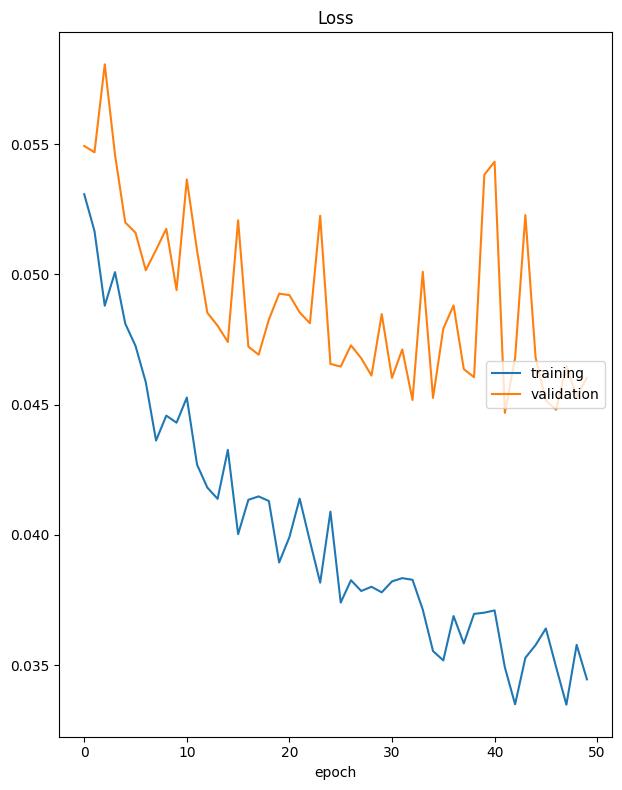

Loss
	training         	 (min:    0.033, max:    0.053, cur:    0.034)
	validation       	 (min:    0.045, max:    0.058, cur:    0.046)
11/11 [==============================] - 0s 37ms/step - loss: 0.0345 - val_loss: 0.0460


In [18]:
# evaluación con mae
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_absolute_error')
# Entrenamiento de la red neuronal con 50 épocas
model.fit(xTrain, yTrain,
          validation_data = (xTest, yTest),
          epochs=50,
          callbacks=[PlotLossesKeras()])

In [19]:
mae_rn_multicapa=model.evaluate(xTest, yTest, verbose=0)
print("MAE Modelo: ", mae_rn_multicapa)

MAE Modelo:  0.046035777777433395


En las dos celdas anteriores, se evaluó el modelo para 50 épocas, según las métricas del MSE y el MAE, respectivemente. Para el primero, se observa que el error tiende asintóticamente a 0 a partir de apoximadamente 10 épocas, y presenta una función suave. Por el otro lado, la métrica del MAE puede describirse como errática, lo cual a primera vista significa que el modelo es más sensible a la métrica del MAE que la del MSE.

Sin embargo, las escalas del eje y en cada gráfica son muy diferentes, y para el MAE esta es muy pequeña. Las fluctuaciones no suben de 0.055 para a partir de 10 épocas, lo cual en términos de la variable de interés, que es una probabilidad de admisión, representa una variación en el error absoluto de máximo 5.5%. Otra razón por las diferencias es que, como la variable de interés se encuentra entre 0 y 1, probablemente el error también lo está. Elevar un número menor a 1 al cuadrado resulta en un número menor, por lo cual la gráfica con MSE tiene valores consistentemente menores a la del MAE.

En conclusión, se observa que para el modelo implementado de 2 capas ocultas de 256 neuronas cada una, el rendimiento se vuelve estable y con muy bajos valores de error a partir de 20 épocas, aproximadamente. El MSE más bajo obtenido del modelo fue de 0.0055, mientras que el MAE fue de 0.046.

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [20]:
K.clear_session()

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(dims,)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(output_var, activation='linear'))

print (model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 68097 (266.00 KB)
Trainable params: 68097 (266.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


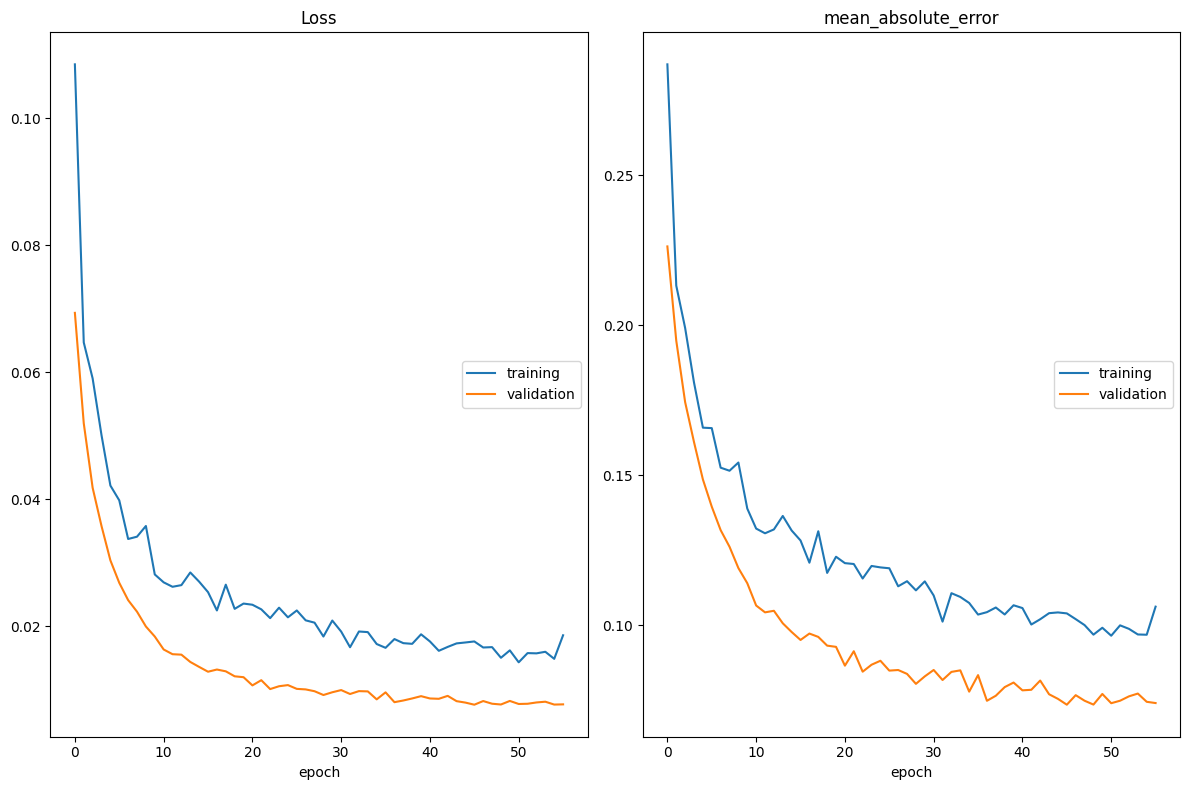

Loss
	training         	 (min:    0.014, max:    0.108, cur:    0.019)
	validation       	 (min:    0.008, max:    0.069, cur:    0.008)
mean_absolute_error
	training         	 (min:    0.096, max:    0.287, cur:    0.106)
	validation       	 (min:    0.073, max:    0.226, cur:    0.074)
11/11 [==============================] - 1s 79ms/step - loss: 0.0186 - mean_absolute_error: 0.1061 - val_loss: 0.0077 - val_mean_absolute_error: 0.0740


In [21]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_absolute_error'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(xTrain, yTrain, epochs=100, validation_data=(xTest, yTest), callbacks=[early_stopping, PlotLossesKeras()])

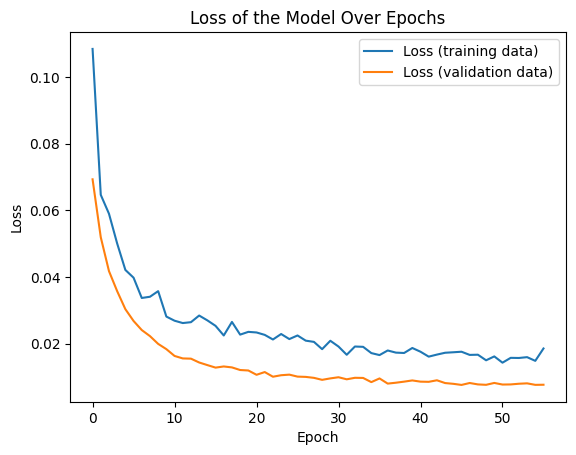

Mean Absolute Error (MAE) on Test set: 0.07344924658536911
Mean Squared Error (MSE) on Test set: 0.00765188317745924


In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Loss (training data)')
plt.plot(history.history['val_loss'], label='Loss (validation data)')
plt.title('Loss of the Model Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

test_metrics = model.evaluate(xTest, yTest, verbose=0)
print(f'Mean Absolute Error (MAE) on Test set: {test_metrics[1]}')
print(f'Mean Squared Error (MSE) on Test set: {test_metrics[0]}')


#### 1. Arquitectura del Modelo
* En la celda anterior, se definió la arquitectura del modelo, empleando dos capas ocultas de 256 neuronas cada una, al igual que el punto dos, lo que nos permite realizar una comparativa entre modelos.
La función de activación es "relu", o Rectified Lineal Unit. Se utilizó para las capas ocultas la función ReLU debido a que esta mantiene el gradiente durante el entrenamiento y actualiza los pesos, lo que mejora la convergencia del modelo. Finalmente se usa la función "linear" para la capa de salida.

#### 2. Regularización (Dropout)
* Se implementa una tasa de dropout de 0.2 para el modelo, lo cual evita que el modelo "memorice" los datos y el sobreajuste.

#### 3. Compilación del Modelo
* Se utilizó el optimizador Descenso de Gradiente Estocástico (SGD, por sus siglas en inglés) debido a su buena capacidad de escapar de los mínimos locales a los que se enfrentan este tipo de problemas a la hora de entrenar, además, es uno de los optimizadores mas utilizados.

#### 4. Early Stopping
* Se agregó early Stopping al modelo dado que monitorizar el val_loss permite detener el entrenamiento cuando este valor deja de mejorar, indicando que el modelo puede estar empezando a sobreajustar. La paciencia de 10 épocas es un buen equilibrio que permite a algunas fluctuaciones ocurrir sin detener el entrenamiento prematuramente.


## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

In [23]:
# Celda 4
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
#  Desempeños
MSE= 0.008723287783614234
MSE_multicapa= 0.005592488683760166
MSE_multicapa_tecnicas= 0.00765188317745924

MAE=0.07291842120488484
MAE_multicapa=0.046035777777433395
MAE_multicapa_tecnicas=0.07344924658536911

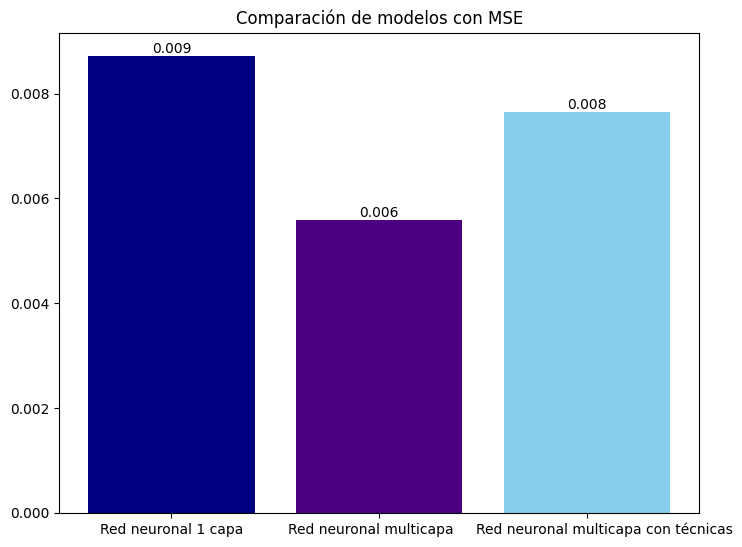

In [29]:
# Gráfico de comparación
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos con MSE")
ejeX = ['Red neuronal 1 capa', 'Red neuronal multicapa    ', '        Red neuronal multicapa con técnicas']
ejeY = [MSE, MSE_multicapa, MSE_multicapa_tecnicas]

colores = ['navy', 'indigo', 'SkyBlue']

bars = ax.bar(ejeX, ejeY, color=colores)

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

plt.show()

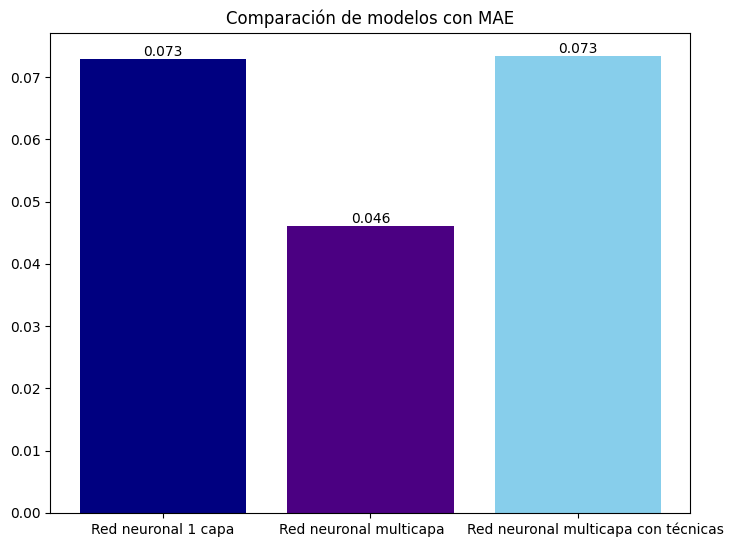

In [28]:
# Gráfico de comparación
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos con MAE")
ejeX = ['Red neuronal 1 capa', 'Red neuronal multicapa    ', '        Red neuronal multicapa con técnicas']
ejeY = [MAE, MAE_multicapa, MAE_multicapa_tecnicas]

colores = ['navy', 'indigo', 'SkyBlue']

bars = ax.bar(ejeX, ejeY, color=colores)

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

plt.show()

## * Conclusiones

Al comparar los resultados obtenidos, se observa que la Red Neuronal multicapa con dos capas ocultas de 256 neuronas cada una muestra el mejor desempeño en términos de métricas de error, con un MSE de 0.0056 y un MAE de 0.046. Esta arquitectura más compleja permite capturar mejor las relaciones en los datos y ofrece una mayor flexibilidad para aprender patrones complejos. Por otro lado, la Red Neuronal de una capa tiene el peor desempeño, con un MSE de 0.0087 y un MAE de 0.0729, posiblemente debido a su simplicidad y su capacidad limitada capacidad para modelar relaciones más complejas en los datos. Finalmente, aunque la Red Neuronal multicapa con Dropout y Early Stopping muestra un rendimiento similar al de la Red Neuronal de una capa en términos de métricas de error, su implementación de técnicas ofrece una ventaja en términos de regularización y prevención del sobreajuste.